In [262]:
#import libraries
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore')

In [227]:
#read in dataset
df = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
#check datatypes and check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<AxesSubplot:ylabel='Density'>

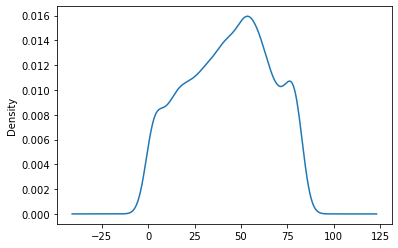

In [36]:
#distribution of age
df.age.plot(kind='kde')

In [25]:
#min and max age
print(df.age.min())
print(df.age.max())

0.08
82.0


<bound method Figure.show of <Figure size 1080x288 with 4 Axes>>

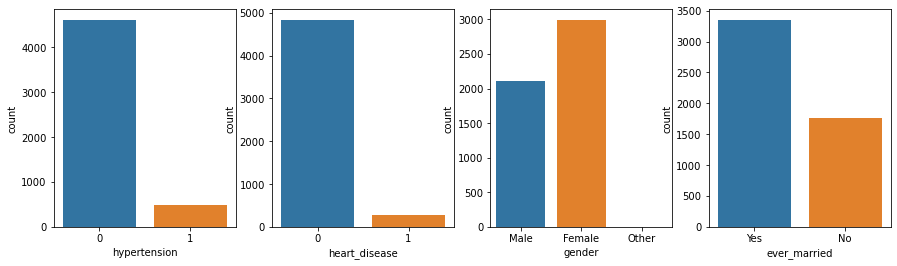

In [201]:
#barplots of count of categorical variables
fig, ax =plt.subplots(1,4,figsize=(15, 4))
sns.countplot(x='hypertension', data=df, ax=ax[0])
sns.countplot(x='heart_disease', data=df, ax=ax[1])
sns.countplot(x='gender', data=df, ax=ax[2])
sns.countplot(x='ever_married', data=df, ax=ax[3])
fig.show

<bound method Figure.show of <Figure size 1080x288 with 3 Axes>>

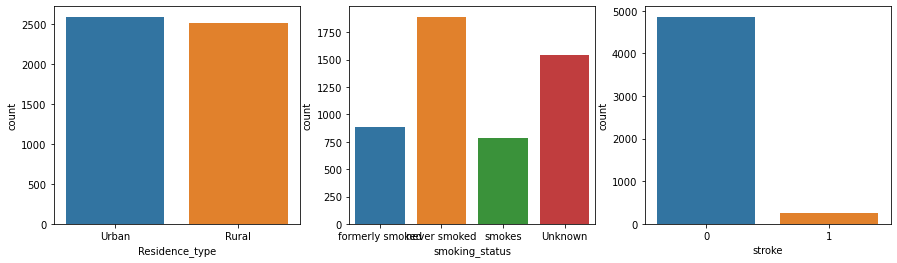

In [202]:
#barplots of count of categorical variables
fig, ax =plt.subplots(1,3,figsize=(15, 4))
sns.countplot(x='Residence_type', data=df, ax=ax[0])
sns.countplot(x='smoking_status', data=df, ax=ax[1])
sns.countplot(x='stroke', data=df, ax=ax[2])
fig.show

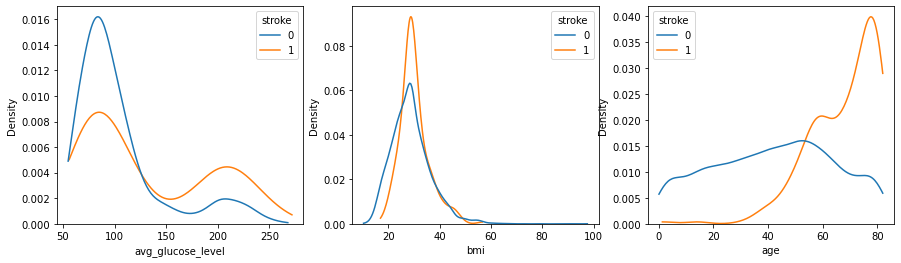

In [204]:
#distribution of glucose level,bmi,age grouped by stroke
fig, ax =plt.subplots(1,3,figsize=(15, 4))
sns.kdeplot(data=df, x="avg_glucose_level", hue="stroke", cut=0, fill=False, common_norm=False, alpha=1, ax=ax[0])
sns.kdeplot(data=df, x="bmi", hue="stroke", cut=0, fill=False, common_norm=False, alpha=1, ax=ax[1])
sns.kdeplot(data=df, x="age", hue="stroke", cut=0, fill=False, common_norm=False, alpha=1, ax=ax[2])
plt.show()

In [39]:
#number of nulls in bmi column
df.bmi.isna().sum()

201

<AxesSubplot:ylabel='Density'>

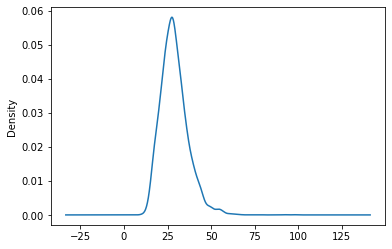

In [40]:
#distribution of bmi before imputation
df.bmi.plot(kind='kde')

In [63]:
#mean of bmi grouped by gender
df.groupby('gender').bmi.mean()

gender
Female    29.065758
Male      28.647936
Other     22.400000
Name: bmi, dtype: float64

In [64]:
#mean of bmi grouped by hypertension
df.groupby('hypertension').bmi.mean()

hypertension
0    28.474069
1    33.036585
Name: bmi, dtype: float64

In [65]:
#mean of bmi grouped by heartdisease
df.groupby('heart_disease').bmi.mean()

heart_disease
0    28.819117
1    30.316461
Name: bmi, dtype: float64

In [ ]:
#average bmi is higher when the person has heart disease or hypertension but relatively equal across genders

In [61]:
#mean and median of bmi
print(X.bmi.mean())
print(X.bmi.median())

28.893236911794673
28.1


In [228]:
#impute null values of bmi
#calculate mean bmi
bmi_mean = df.bmi.mean()
#fill null values with mean bmi
df['bmi_imputed'] = df.bmi.fillna(bmi_mean)

<AxesSubplot:ylabel='Density'>

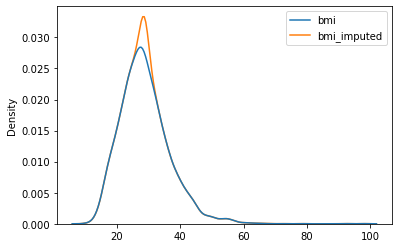

In [212]:
#compare distributions before and after imputation
sns.kdeplot(data=df[['bmi','bmi_imputed']])

<AxesSubplot:xlabel='stroke', ylabel='count'>

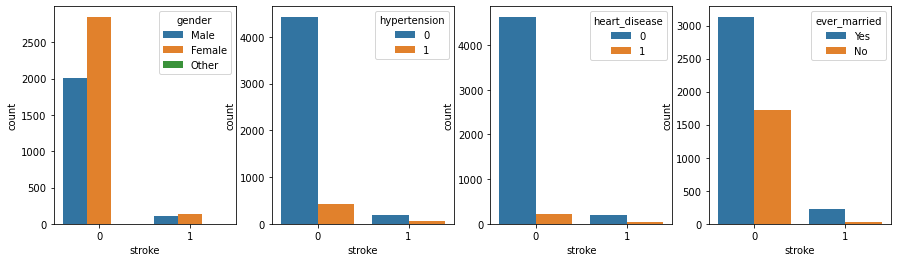

In [214]:
fig, ax =plt.subplots(1,4,figsize=(15, 4))
sns.countplot(x= 'stroke', hue='gender', data = df, ax=ax[0])
sns.countplot(x= 'stroke', hue='hypertension', data = df, ax=ax[1])
sns.countplot(x= 'stroke', hue='heart_disease', data = df, ax=ax[2])
sns.countplot(x= 'stroke', hue='ever_married', data = df, ax=ax[3])

<AxesSubplot:xlabel='stroke', ylabel='count'>

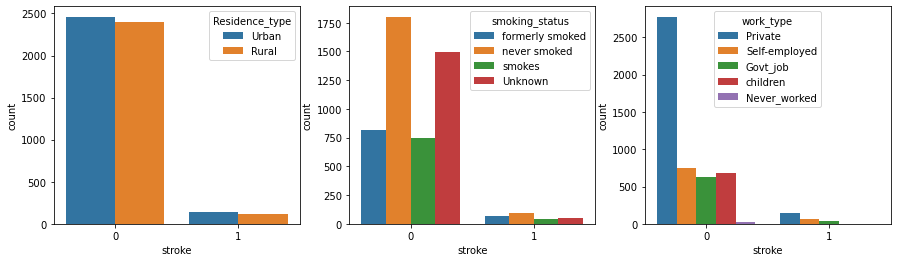

In [215]:
fig, ax =plt.subplots(1,3,figsize=(15, 4))
sns.countplot(x= 'stroke', hue='Residence_type', data = df,ax=ax[0])
sns.countplot(x= 'stroke', hue='smoking_status', data = df,ax=ax[1])
sns.countplot(x= 'stroke', hue='work_type', data = df,ax=ax[2])

C:\Users\njeri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

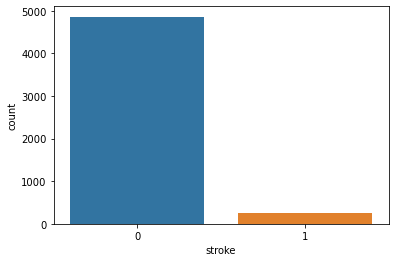

In [58]:
#check data imbalance in output variable
sns.countplot(y)

In [216]:
#check relationship between categorical variables and stroke
csq=chi2_contingency(pd.crosstab(df['stroke'], df['gender']))
print("P-value gender: ",csq[1])

csq=chi2_contingency(pd.crosstab(df['stroke'], df['heart_disease']))
print("P-value heart_disease: ",csq[1])

csq=chi2_contingency(pd.crosstab(df['stroke'], df['hypertension']))
print("P-value hypertension: ",csq[1])

csq=chi2_contingency(pd.crosstab(df['stroke'], df['ever_married']))
print("P-value ever_married: ",csq[1])

csq=chi2_contingency(pd.crosstab(df['stroke'], df['Residence_type']))
print("P-value residence type: ",csq[1])

csq=chi2_contingency(pd.crosstab(df['stroke'], df['smoking_status']))
print("P-value smoking status: ",csq[1])

csq=chi2_contingency(pd.crosstab(df['stroke'], df['work_type']))
print("P-value work_type: ",csq[1])

P-value gender:  0.7895490538408245
P-value heart_disease:  2.088784568522924e-21
P-value hypertension:  1.661621901511823e-19
P-value ever_married:  1.6389021142314745e-14
P-value residence type:  0.29833169286876987
P-value smoking status:  2.0853997025008455e-06
P-value work_type:  5.397707801896119e-10


In [ ]:
#p-values for gender and residence type are high suggesting that there is no relationship between these variables and the 
#stroke variable, so these vars may not be relevant in classification

In [217]:
#check the correlation between numerical variables to see if there is any redundancy in the data
num = ['bmi','age','avg_glucose_level']

corr_df=df[num]  #New dataframe to calculate correlation between numeric features
cor= corr_df.corr(method='pearson')
print(cor)

#no high correlation values implies no redundancy in the data

                        bmi       age  avg_glucose_level
bmi                1.000000  0.333398           0.175502
age                0.333398  1.000000           0.238171
avg_glucose_level  0.175502  0.238171           1.000000


In [229]:
#drop the id and residence_type and bmi column since not relevant for prediction
df_dropped = df.drop(['id', 'Residence_type','bmi'], axis = 1)

In [230]:
#create X and y variables
y = df_dropped['stroke']
X = df_dropped.drop('stroke',axis=1)

In [231]:
#create dummy variables for all categorical data
gender = pd.get_dummies(X['gender'], drop_first = True)
ever_married = pd.get_dummies(X['ever_married'], drop_first = True)
work_type = pd.get_dummies(X['work_type'], drop_first = True)
smoking_status = pd.get_dummies(X['smoking_status'], drop_first = True)

In [232]:
#drop categorical variables from X dataframe
X = X.drop(['gender','ever_married','work_type','smoking_status'], axis = 1)
#concatenate new dummy variables with the continuous variables
X = pd.concat([X,gender,ever_married,work_type],axis =1)
#check X dataframe
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi_imputed,Male,Other,Yes,Never_worked,Private,Self-employed,children
0,67.0,0,1,228.69,36.600000,1,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,1,0,0
3,49.0,0,0,171.23,34.400000,0,0,1,0,1,0,0
4,79.0,1,0,174.12,24.000000,0,0,1,0,0,1,0


In [233]:
#check data types and make sure no nulls in final data frame
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi_imputed        5110 non-null   float64
 5   Male               5110 non-null   uint8  
 6   Other              5110 non-null   uint8  
 7   Yes                5110 non-null   uint8  
 8   Never_worked       5110 non-null   uint8  
 9   Private            5110 non-null   uint8  
 10  Self-employed      5110 non-null   uint8  
 11  children           5110 non-null   uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 234.7 KB


In [240]:
#scale variables before prediction
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
#split data into train and test (25% test), stratify on the y variable to make sure there is stroke patients in train and test
X_train, X_test, y_train, y_test = train_test_split(scaled,y, test_size = 0.25, random_state = 31, stratify=y)

## Logistic Regression

In [242]:
#quantify the imbalance in the training data
y_train.value_counts()/y_train.shape[0]

0    0.9512
1    0.0488
Name: stroke, dtype: float64

In [243]:
#create a weight variable for logistic regression
w = {0:4,1:95}

In [244]:
#weighted logistic regression using above weights
lr1 = LogisticRegression(random_state=31, class_weight=w)
lr1.fit(X_train,y_train)
# test
y_pred1 = lr1.predict(X_test)

In [246]:
#output results
print(f'Accuracy Score: {accuracy_score(y_test,y_pred1)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred1)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred1)}')
print(f'Recall score: {recall_score(y_test,y_pred1)}')
print(f'F1 score: {f1_score(y_test,y_pred1)}')

Accuracy Score: 0.7034428794992176
Confusion Matrix: 
[[850 366]
 [ 13  49]]
Area Under Curve: 0.744667869269949
Recall score: 0.7903225806451613
F1 score: 0.20545073375262052


In [ ]:
#f1 score is most accurate measurement here given the imbalance, prediction is not good with this model

In [247]:
#logistic regression with class weights as balanced
lr2 = LogisticRegression(random_state=31, class_weight = 'balanced')
lr2.fit(X_train,y_train)
# test
y_pred2 = lr2.predict(X_test)

In [248]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred2)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred2)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred2)}')
print(f'Recall score: {recall_score(y_test,y_pred2)}')
print(f'F1 score: {f1_score(y_test,y_pred2)}')

Accuracy Score: 0.7339593114241002
Confusion Matrix: 
[[892 324]
 [ 16  46]]
Area Under Curve: 0.7377440577249575
Recall score: 0.7419354838709677
F1 score: 0.21296296296296297


In [ ]:
#minimal increase in f1 score when using balanced class weights

## Random Forest Classifier

In [249]:
#import relevant packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [151]:
#define classifier
clf = RandomForestClassifier(random_state = 34)

In [277]:
#define parameter ranges for gridsearch
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [278]:
#run hyperparameter search
cv_clf = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5)
cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=34),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [279]:
#get best parameters as decided by gridsearch
cv_clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [280]:
#define classifier with selected parameters
clf1 = RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features = 'sqrt', n_estimators = 200,class_weight = 'balanced')

In [281]:
#fit and predict
clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)

In [282]:
#results
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')

Accuracy Score: 0.7269170579029735
Confusion Matrix: 
[[882 334]
 [ 15  47]]
Area Under Curve: 0.7416967317487266
Recall score: 0.7580645161290323
F1 score: 0.21218961625282165


## Resample data to address class imbalance

In [258]:
#apply undersampling
rus = RandomUnderSampler(sampling_strategy=0.1, random_state=0)

#only undersample training data
X_data_rus, y_data_rus = rus.fit_resample(X_train, y_train)

In [263]:
#apply over sampling
ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X_data_balanced, y_data_balanced = ros.fit_resample(X_data_rus, y_data_rus)

In [265]:
#check counts now data has been resampled
y_data_balanced.value_counts()

0    1870
1    1870
Name: stroke, dtype: int64

In [266]:
#random forest on resampled data
clf1.fit(X_data_balanced,y_data_balanced)
y_pred_rus = clf1.predict(X_test)

In [267]:
#results
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_rus)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_rus)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_rus)}')
print(f'Recall score: {recall_score(y_test,y_pred_rus)}')
print(f'F1 score: {f1_score(y_test,y_pred_rus)}')

Accuracy Score: 0.7167449139280125
Confusion Matrix: 
[[864 352]
 [ 10  52]]
Area Under Curve: 0.7746179966044143
Recall score: 0.8387096774193549
F1 score: 0.22317596566523606


In [283]:
#gridsearch on resampled data
cv_clf.fit(X_data_balanced,y_data_balanced)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=34),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [284]:
#best parameters for resampled data
cv_clf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [285]:
#create classifier on rebalanced data
clf2 = RandomForestClassifier(criterion = 'gini', max_depth = 8, max_features = 'sqrt', n_estimators = 200,class_weight = 'balanced')

In [286]:
#fit and predict
clf2.fit(X_data_balanced,y_data_balanced)
y_pred2 = clf2.predict(X_test)

In [287]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred2)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred2)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred2)}')
print(f'Recall score: {recall_score(y_test,y_pred2)}')
print(f'F1 score: {f1_score(y_test,y_pred2)}')
#rebalancing data has increased f1 score

Accuracy Score: 0.7965571205007824
Confusion Matrix: 
[[979 237]
 [ 23  39]]
Area Under Curve: 0.7170654711375212
Recall score: 0.6290322580645161
F1 score: 0.23076923076923075


## XGBoost

In [181]:
#import relevant packages
from xgboost import XGBClassifier

In [269]:
#define classifier, fit and predict using resampled data
xgb1 = XGBClassifier()
xgb1.fit(X_data_balanced,y_data_balanced)
y1 = xgb1.predict(X_test)

In [270]:
#results
print(f'Accuracy Score: {accuracy_score(y_test,y1)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y1)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y1)}')
print(f'Recall score: {recall_score(y_test,y1)}')
print(f'F1 score: {f1_score(y_test,y1)}')

Accuracy Score: 0.8873239436619719
Confusion Matrix: 
[[1116  100]
 [  44   18]]
Area Under Curve: 0.604042869269949
Recall score: 0.2903225806451613
F1 score: 0.20000000000000004


In [275]:
#define classifier, fit and predict using imbalanced data
xgb1 = XGBClassifier()
xgb1.fit(X_train,y_train)
y2 = xgb1.predict(X_test)

In [276]:
print(f'Accuracy Score: {accuracy_score(y_test,y2)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y2)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y2)}')
print(f'Recall score: {recall_score(y_test,y2)}')
print(f'F1 score: {f1_score(y_test,y2)}')

Accuracy Score: 0.9428794992175273
Confusion Matrix: 
[[1201   15]
 [  58    4]]
Area Under Curve: 0.5260903013582343
Recall score: 0.06451612903225806
F1 score: 0.09876543209876543


In [288]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05, 0.1, 0.3], #so called `eta` value
              'max_depth': [6,7,8],
              'min_child_weight': [0.5,1,2],
              'subsample': [0.5,0.8,1],
              'colsample_bytree': [0.5,0.7,1],
              'missing':[-999],
              'seed': [1337]}

In [291]:
cv_xgb = GridSearchCV(xgb1, parameters, n_jobs=5, 
                   cv=5, 
                   scoring='f1_micro',
                   verbose=2, refit=True)

In [292]:
cv_xgb.fit(X_data_balanced,y_data_balanced)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_ca...
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.05, 0.1, 0.3],
                         'max_depth': [6, 7, 8],
                         'min_child_weight': [0.5, 1, 2], 'missing': [-999],
                         'nthread': [4], 'objective': ['binary:logistic'],
                         'seed': [1337], 'subsample': [0.5, 0.8, 1]},
             scoring='f1_micro', verbose=2)

In [293]:
cv_xgb.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 8,
 'min_child_weight': 0.5,
 'missing': -999,
 'nthread': 4,
 'objective': 'binary:logistic',
 'seed': 1337,
 'subsample': 0.8}

In [294]:
xgb2 = XGBClassifier(colsample_bytree= 0.7,learning_rate= 0.3, max_depth= 8, min_child_weight= 0.5,
 missing= -999, nthread= 4,objective= 'binary:logistic',seed= 1337,subsample= 0.8)

In [295]:
xgb2.fit(X_data_balanced,y_data_balanced)
y2 = xgb2.predict(X_test)

In [296]:
#results
print(f'Accuracy Score: {accuracy_score(y_test,y2)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y2)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y2)}')
print(f'Recall score: {recall_score(y_test,y2)}')
print(f'F1 score: {f1_score(y_test,y2)}')

Accuracy Score: 0.9076682316118936
Confusion Matrix: 
[[1138   78]
 [  40   22]]
Area Under Curve: 0.6453469864176571
Recall score: 0.3548387096774194
F1 score: 0.2716049382716049
